# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [29]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [30]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [31]:
A@e_1 
# Selects the the first column of A (1,4,7) 
# This is because the row vector is multiplied by each row, summing the multiplicative results of each element in the row times each corresponding element in the column vector.
# Since the second two elements in the column vector are 0, the second two elements in each row multiply to zero, leaving only the items in the first column in the summation.

array([1, 4, 7])

In [32]:
A@e_2
# Selects the second column of A (2,5,8) for the same reasons.

array([2, 5, 8])

In [33]:
A@e_3
# Selects the third column of A (2,5,8) for the same reasons.

array([3, 6, 9])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [34]:
u = np.ones(3)

In [35]:
A@u
# This result is just addition across rows.
# In matrix multiplication, each element of the column vector is multiplied by the element in x that has the same column # as the first vector has for its row #.
# Then each of these results are added across the row.
# Since all elements of u are 1, it is just the elements in each row of A added together.

array([ 6., 15., 24.])

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [36]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [37]:
A@x
# It results in vector x itself. 
# This is because the identity matrix, when multiplied by x, only selects the first element from the first row of x, the second element from the second row of x, etc.
# Nothing leads to adding across rows because every element in the identiyy matrix except one is zero.


array([-2,  4, 11])

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [38]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


In [39]:
A@x
# This takes the elements in array x and shuffles them around, since only the 11 is "saved" (not multiplied by 0) by the first row of A, etc.

array([11, -2,  4])

In [40]:
B = np.array([ [0,1,0],
              [0,0,1],
              [1,0,0]])
B@x

array([ 4, 11, -2])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [41]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [42]:
A@e_1
# This is the first column - all the proportions of observations who moved from state 0 (j, column #) to another state (i, row #).

array([0.50052958, 0.02574731, 0.47372311])

In [43]:
A@e_2
# This is the second column - all the proportions of observations who moved from state 1 (j, column #) to another state (i, row #).

array([0.24049286, 0.39251588, 0.36699127])

In [44]:
A@e_3
# This is the third column - all the proportions of observations who moved from state 2 (j, column #) to another state (i, row #).

array([0.18358131, 0.37907577, 0.43734292])

f. For each of the vectors $e_1, e_2, e_3$, multiply $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [45]:
def mult(v1, v2):
    return v1@v2

def mult_mult(v1, v2, x):
    results = []
    for _ in range(1, x+1):
        results.append(np.linalg.matrix_power(v1, _) @ v2)
    return results

print(mult_mult(A, e_1, 5))

# Some help from ChatGPT here comprehending how to use recursion to multiply A by the result each time and using np.linalg.matrix_power - CNK

[array([0.50052958, 0.02574731, 0.47372311]), array([0.34368862, 0.20257047, 0.45374091]), array([0.30404142, 0.26036337, 0.43559521]), array([0.29476439, 0.27514859, 0.43008701]), array([0.29266551, 0.27862515, 0.42870935])]


In [46]:
print(mult_mult(A, e_2, 5))

[array([0.24049286, 0.39251588, 0.36699127]), array([0.28214379, 0.29937825, 0.41847795]), array([0.29004438, 0.28341002, 0.42654561]), array([0.29163968, 0.2804039 , 0.42795643]), array([0.29197422, 0.27979983, 0.42822595])]


In [47]:
print(mult_mult(A, e_3, 5))

[array([0.18358131, 0.37907577, 0.43734292]), array([0.26334088, 0.31930609, 0.41735304]), array([0.28521895, 0.29032145, 0.4244596 ]), array([0.29050361, 0.28220175, 0.42729464]), array([0.29171646, 0.2802254 , 0.42805814])]


In [48]:
# The arrays all come out to about the same values as compared to each other. 
# This shows that chains settle down into 'long-run proportions' - the dependence on initial conditions gets very small to null. This is the general rule of a Markov chain.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [49]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [50]:
s1 = [1,0]
T@s1 
# The result is [(1*0.25 + 0*0.5), (1*0.75 + 0*0.5)].
# This means that 25% of the time, the transition from state 1 to state 1 will occur (ie no state change) and 75% of the time, the transition from state 1 to state 2 will occur.

array([0.25, 0.75])

In [51]:
T@(T@s1)
# Pre multiply by T (not post)
# This means that the probability that a state that went from 1 to 1 will stay at 1 is 43.75% and the probability that a state that went from 1 to 2 will stay at state 2 is 56.25%.
# The rest of the possibilities are implied by this.

array([0.4375, 0.5625])

In [52]:
print(mult_mult(T, s1, 5))

# Settles out by third iteration


[array([0.25, 0.75]), array([0.4375, 0.5625]), array([0.390625, 0.609375]), array([0.40234375, 0.59765625]), array([0.39941406, 0.60058594])]


In [53]:
s2 = [0,1]

print(mult_mult(T, s2, 5))

# Also settles out by third iteration to about the same proportions as starting at s1

[array([0.5, 0.5]), array([0.375, 0.625]), array([0.40625, 0.59375]), array([0.3984375, 0.6015625]), array([0.40039062, 0.59960938])]


3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [54]:
import pandas as pd

weather = pd.read_csv("./cville_weather.csv")

weather.info()
# Most datatypes are objects; a few are floats. 
# SNWD and SNWD_ATTRIBUTES only have one non-null entry each. This is curious...
# DAPR, DAPR_ATTRIBUTRES, MDPR, MDPR_ATTRIBUTES are missing the second-most data, with only 12 non null entries for each.
# Other columns are also missing some data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB


In [55]:
# Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.

weather['rain_state'] = weather['PRCP'] > 0

In [56]:
# Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 

T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]]) # What values are we supposed to fill here? Using these as placeholders

# It is 50% likely to rain today if it rained yesterday. It is 75% likely to rain today if it was clear yesterday. ## Fix for new values of T

In [57]:
# Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?

s1 = [1, 0] # From clear to rain (is this correct? Should it be [0,0] ie from clear to clear?)

print(mult_mult(T, s1, 5))

# It converges by the third iteration

[array([0.25, 0.75]), array([0.4375, 0.5625]), array([0.390625, 0.609375]), array([0.40234375, 0.59765625]), array([0.39941406, 0.60058594])]


In [ ]:
s2 = [0,1] # From rain to clear (is this correct? Should it be [1,1] ie from rain to rain?)

print(mult_mult(T, s2, 5))

# It converges by the third iteration as well

[array([0.5, 0.5]), array([0.375, 0.625]), array([0.40625, 0.59375]), array([0.3984375, 0.6015625]), array([0.40039062, 0.59960938])]


Axes(0.125,0.11;0.775x0.77)


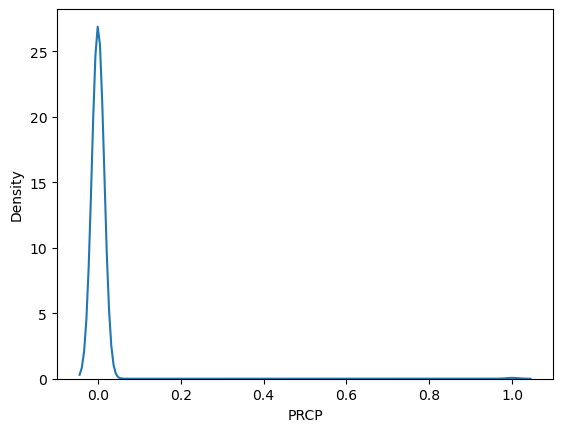

In [ ]:
# Conditional on being rainy, plot a KDE of the `PRCP` variable.

# How do I incorporate the condition of it being rainy? I think the way I did it is wrong but incorporating Markov chain into this seems too complicated for our purview.

import seaborn as sns

my_kde = sns.kdeplot(weather['PRCP'] == 1)
print(my_kde)

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?